#Q 3- Mushroom Classification As Poisonous Or Edible
A Sadhana

3122 21 5001 089


In [109]:
#Q 3- MUSHROOM CLASSIFICATION AS POISONOUS OR EDIBLE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [134]:
#Loading Dataset
df = pd.read_csv("agaricus-lepiota.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [112]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [135]:
#Preprocessing Data
#Converting character data to numbers
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
df1 = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
df2 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [115]:
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [114]:
df2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.036613,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,-0.964680,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-0.964680,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.036613,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,-0.964680,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.964680,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,-0.964680,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.964680,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,1.036613,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


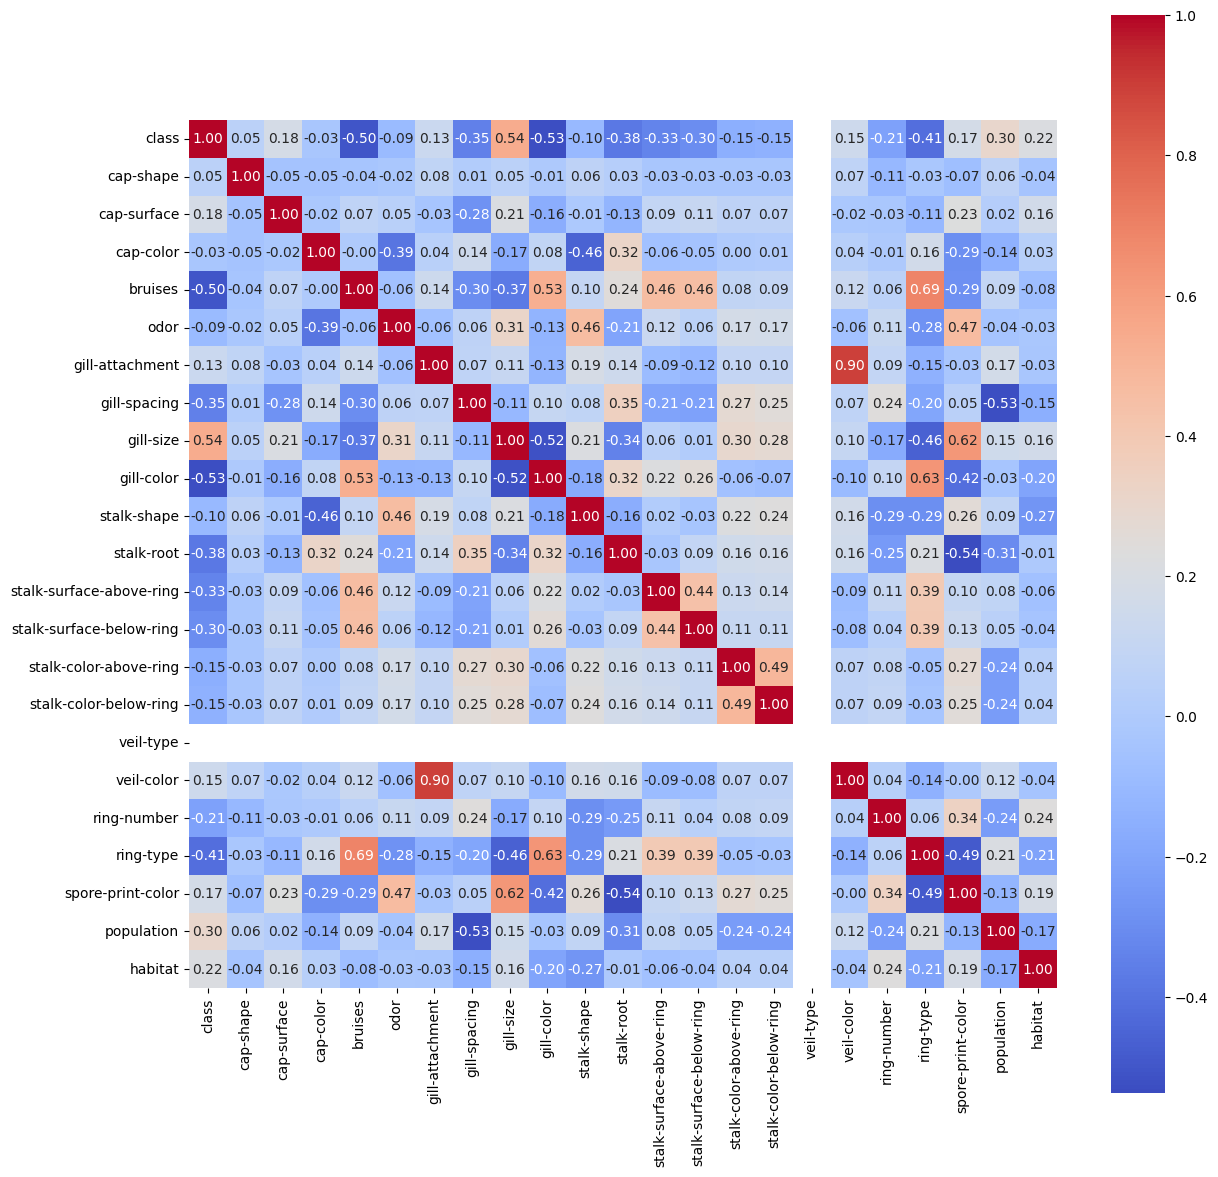

In [136]:
# Correlation Heatmap
corr_matrix = df2.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix,annot=True,fmt = ".2f",cmap = "coolwarm",cbar = True,square = True)

plt.show()

In [137]:
#feature engineering- Dropping veil-type
df2=df2.drop(['veil-type' ], axis=1)

In [138]:
#separating features from label
Y=df1['class']
X=df2.drop(['class'], axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [139]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [183]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [184]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3829,1.029712,-1.486157,-0.591075,-0.843230,-1.019565,0.162896,-0.438864,-0.669038,0.618426,-1.144806,...,-0.925437,-0.893053,-0.955152,-3.038361,0.142037,-0.256132,-0.162067,-1.089919,1.083049,-0.295730
2384,1.029712,-1.486157,-0.198250,1.185917,0.406562,0.162896,-0.438864,-0.669038,1.465850,0.873511,...,0.683778,0.586385,0.096577,0.107655,0.142037,-0.256132,0.948081,-0.250471,0.284330,-0.877169
7008,-0.216992,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,1.465850,-1.144806,...,0.683778,-0.893053,0.622441,0.631991,0.142037,3.433255,0.948081,1.428426,-0.514389,-0.295730
5501,1.029712,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,-0.893053,0.622441,0.107655,0.142037,-0.256132,-1.272216,1.428426,0.284330,1.448589
5765,-0.840343,0.140128,1.373049,1.185917,-1.019565,0.162896,-0.438864,-0.669038,-0.511472,0.873511,...,-2.534652,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-1.089919,-0.514389,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,-0.840343,0.953270,1.765874,-0.843230,-1.019565,0.162896,-0.438864,-0.669038,0.618426,-1.144806,...,-0.925437,-0.893053,-0.955152,-0.941017,0.142037,-0.256132,-0.162067,-1.089919,0.284330,-0.877169
7751,-0.216992,0.953270,-0.983899,-0.843230,1.357313,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,0.586385,0.622441,0.107655,0.142037,-0.256132,-1.272216,1.428426,0.284330,-0.877169
7143,-2.087047,-1.486157,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,0.618426,-1.144806,...,0.683778,-0.893053,0.622441,0.631991,0.142037,3.433255,0.948081,1.428426,-1.313108,-0.295730
820,-2.087047,0.140128,1.765874,1.185917,-0.544189,0.162896,-0.438864,-0.669038,1.465850,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149


In [185]:
x_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4525,-0.840343,0.953270,-0.591075,-0.843230,-1.019565,0.162896,-0.438864,-0.669038,0.618426,-1.144806,...,-0.925437,-0.893053,0.096577,-0.941017,0.142037,-0.256132,-0.162067,-1.089919,1.083049,-0.877169
407,1.029712,0.140128,1.373049,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.793947,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-0.514389,0.867149
2229,1.029712,-1.486157,-0.983899,1.185917,0.406562,0.162896,-0.438864,-0.669038,0.618426,0.873511,...,0.683778,0.586385,-1.481017,0.631991,0.142037,-0.256132,0.948081,-0.670195,0.284330,-0.877169
3487,-0.840343,0.953270,-0.198250,1.185917,0.406562,0.162896,-0.438864,-0.669038,1.183375,0.873511,...,0.683778,0.586385,0.096577,-1.465353,0.142037,-0.256132,0.948081,-0.670195,1.083049,-0.877169
6464,-0.840343,0.953270,-0.198250,-0.843230,-1.019565,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,0.586385,0.622441,0.107655,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.793947,-1.144806,...,0.683778,-0.893053,0.622441,0.631991,0.142037,3.433255,0.948081,1.428426,-1.313108,-0.295730
8080,-0.216992,0.140128,-0.198250,-0.843230,1.357313,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,-0.893053,0.096577,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,-0.877169
397,1.029712,0.953270,1.765874,1.185917,-0.544189,0.162896,-0.438864,-0.669038,1.465850,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-0.514389,0.867149
7513,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.793947,-1.144806,...,-0.925437,0.586385,0.622441,0.631991,0.142037,3.433255,0.948081,1.428426,-1.313108,-0.295730


In [186]:
y_train

3829    1
2384    0
7008    0
5501    1
5765    1
       ..
4827    1
7751    1
7143    0
820     0
5257    0
Name: class, Length: 5686, dtype: int64

In [187]:
y_test

4525    1
407     0
2229    0
3487    0
6464    1
       ..
7983    0
8080    1
397     0
7513    0
7756    1
Name: class, Length: 2438, dtype: int64

In [249]:
# Linear Regression
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(x_train, y_train)
y_pred = modellr.predict(x_test)
lr_accu= modellr.score(x_test, y_test)
print(f"Accuracy (R-squared): {lr_accu:.2f}")

Accuracy (R-squared): 0.73


In [251]:
# Perceptron Learning Algorithm
class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, max_epochs=100):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

    def train(self, X, y):
        for _ in range(self.max_epochs):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                update = self.learning_rate * (yi - prediction)
                self.weights += update * xi
                self.bias += update
perceptron = Perceptron(num_features=x_train.shape[1])
perceptron.train(x_train.values, y_train.values)

In [252]:
print(perceptron.weights , perceptron.bias)

[ 0.03065504  0.00057252 -0.00165176  0.08247465 -0.10239184 -0.09071005
 -0.33301454  0.41665746 -0.00909107 -0.06776415 -0.43479415 -0.34153228
  0.03346399 -0.02693535 -0.01830142  0.55280658  0.00664853  0.3939004
 -0.00358967 -0.03236169  0.01538768] -0.16999999999999998


In [253]:
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(x_test.values)
print(y_pred)

[1 0 0 ... 0 1 1]


In [254]:
l1 = (list(y_test))
print(len(l1),len(y_pred))

2438 2438


In [255]:
accu = 0
for i in range(len(l1)):
  if l1[i] == y_pred[i]:
    accu += 1
pla_accu=(accu/len(y_pred))*100
print(pla_accu)

93.92945036915505


[1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

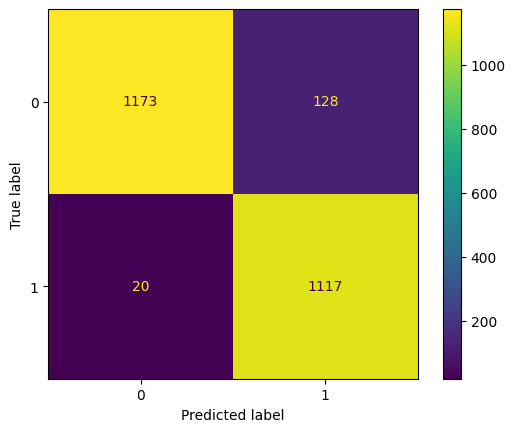

In [256]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = l1
print(actual)
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [257]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [258]:
print(y_train.shape, x_train.shape, x_test.shape,y_test.shape)

(5686,) (5686, 21) (2438, 21) (2438,)


In [259]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_dim = x_train.shape[1]
output_dim = 1

model = Sequential([
    Dense(64, input_dim=input_dim, activation='tanh'),
    Dense(128, input_dim=input_dim, activation='tanh'),
    Dense(64, input_dim=input_dim, activation='tanh'),
    Dense(output_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train.values, y_train.values, epochs=5, batch_size=32, validation_split=0.3)
loss, mlp_accu = model.evaluate(x_test.values, y_test.values)
print("Test Loss:", loss)
print("Test Accuracy:", mlp_accu)

Epoch 1/5
125/125 [==============================] - 3s 6ms/step - loss: 0.2021 - accuracy: 0.9279 - val_loss: 0.0939 - val_accuracy: 0.9654
Epoch 2/5
125/125 [==============================] - 1s 4ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0302 - val_accuracy: 0.9936
Epoch 3/5
125/125 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0116 - val_accuracy: 0.9988
Epoch 4/5
125/125 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 5/5
77/77 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9996
Test Loss: 0.00334826298058033
Test Accuracy: 0.9995898008346558


In [198]:
# Support Vector Machine
from sklearn.svm import SVC
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(x_train,y_train)
y_pred_SVM = SVM.predict(x_test)

In [199]:
svm_accu = accuracy_score(y_test, y_pred_SVM)
print(svm_accu)

0.9753896636587367


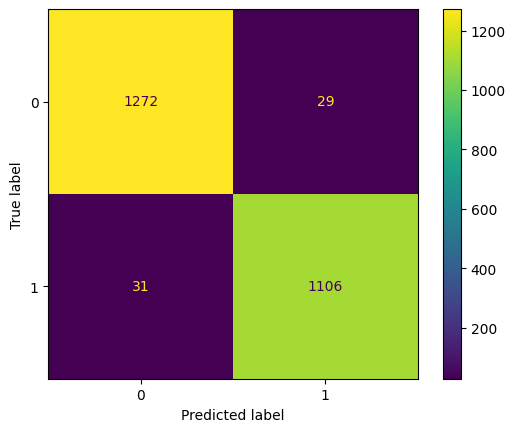

In [200]:
actual = y_test
predicted = y_pred_SVM

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

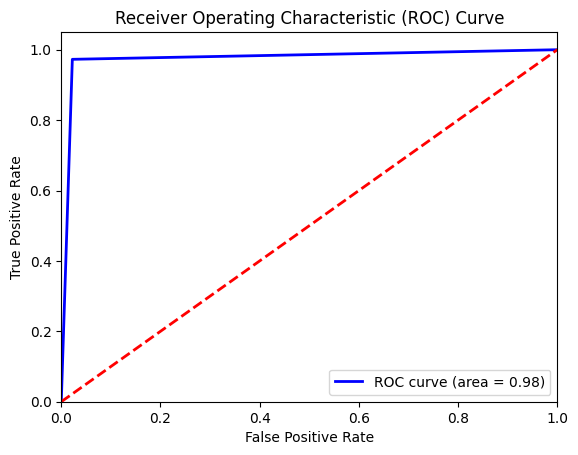

In [201]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test.values, y_pred_SVM)  # Calculate AUC score
fpr, tpr, thres = roc_curve(y_test.values, y_pred_SVM)  # Compute ROC curve and ROC area

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [223]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=12)
KNN.fit(x_train, y_train)
y_pred_KNN = KNN.predict(x_test)

In [224]:
knn_accu = accuracy_score(y_test, y_pred_KNN)
print(knn_accu)

0.9979491386382281


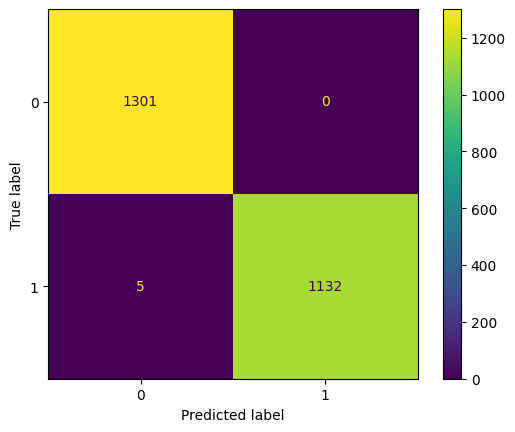

In [232]:
actual = y_test
predicted = y_pred_KNN

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

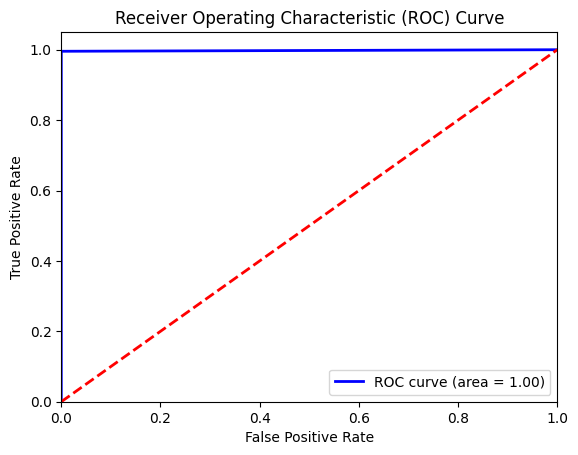

In [227]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test.values, y_pred_KNN)  # Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_KNN)  # Compute ROC curve and ROC area

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [234]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)
y_pred_NB = nb_classifier.predict(x_test)

In [235]:
nb_accu = accuracy_score(y_test, y_pred_NB)
print(nb_accu)

0.9191960623461854


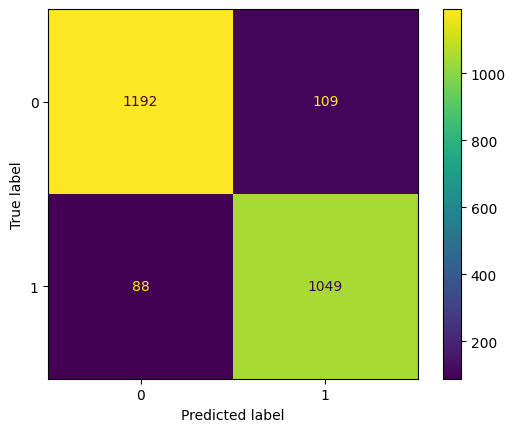

In [236]:
actual = y_test
predicted = y_pred_NB

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

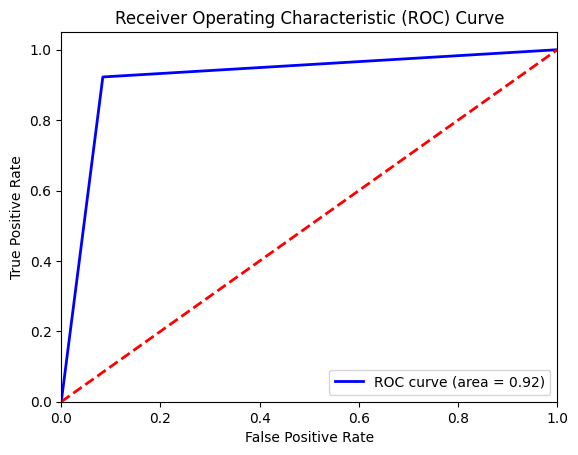

In [237]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test.values, y_pred_NB)  # Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_NB)  # Compute ROC curve and ROC area

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[417886.42540620314, 303747.14025012427, 254575.53667819995, 222735.2556069484, 202659.49203189462, 188110.34749313668, 177091.31217322365, 168309.1637652199, 157001.53575381948, 150947.1880632908, 143187.65545869796, 139597.84691245077, 135432.62200904195, 131164.21104981308, 128545.54654917917, 124358.39911631607, 121408.7236559024, 118202.85423382504, 116813.1523909794]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


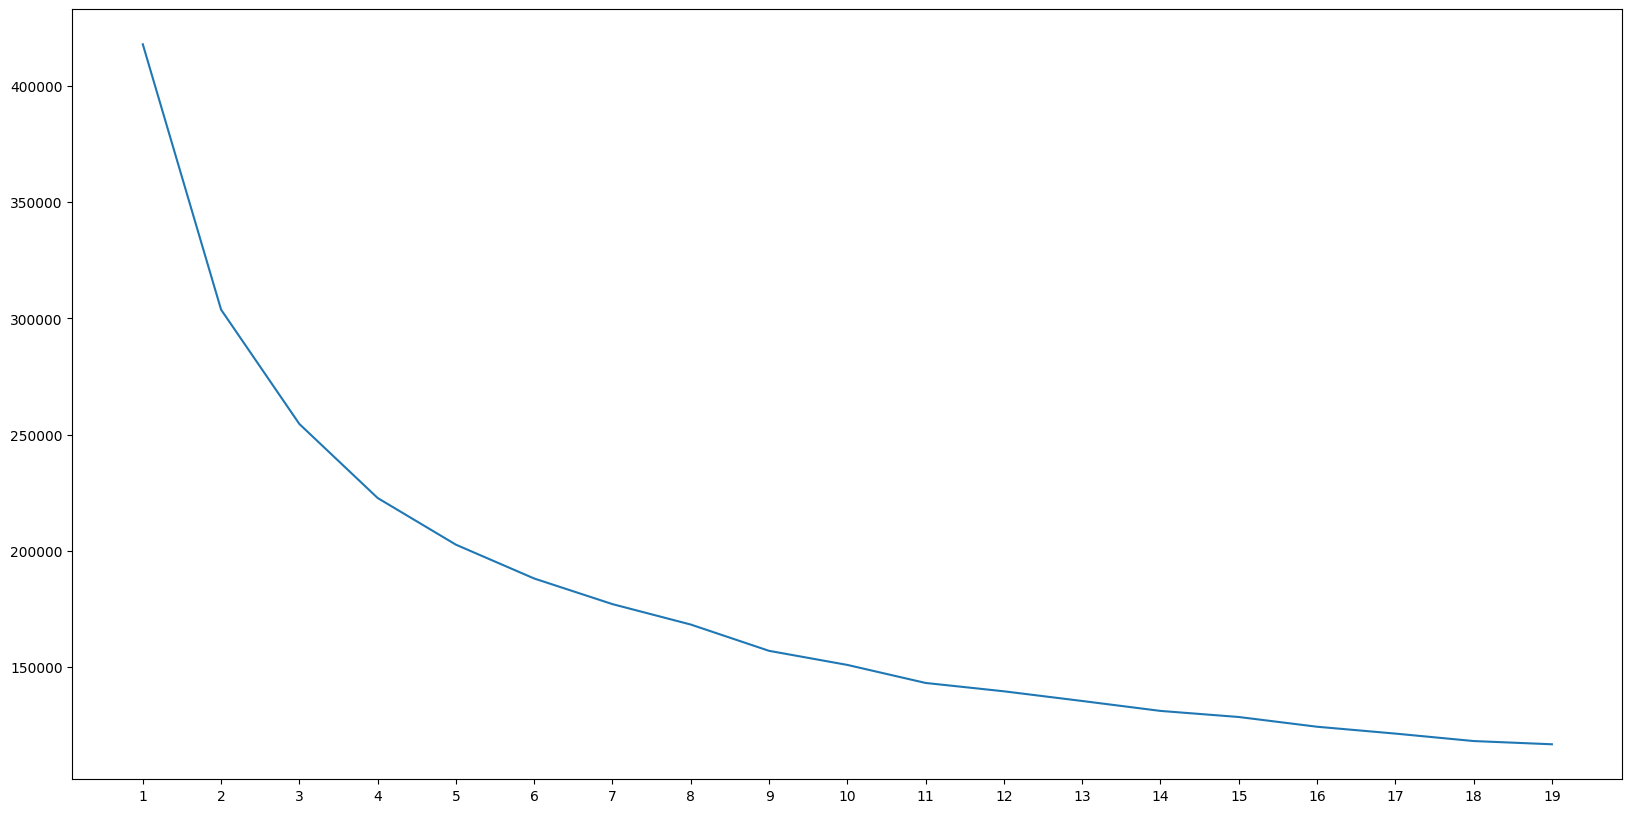

In [238]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
import matplotlib
print(wcss)
plt.figure(figsize=(20,10))
arr = [i for i in range(1,20)]
print(arr)
plt.xticks(range(1,20))
plt.plot(arr,wcss)


In [179]:
!pip install kneed

In [239]:
from kneed import KneeLocator as knq
k1 = knq(range(1,20),wcss,curve="convex",direction="decreasing")
print(k1.elbow)

5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


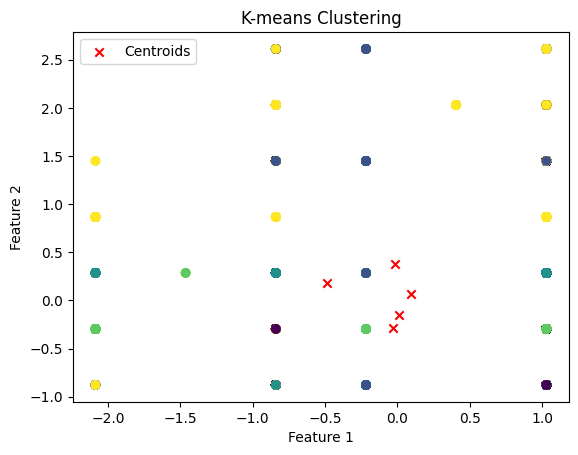

In [247]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5)

# Fitting with inputs
kmeans.fit(X)

# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
centers = kmeans.cluster_centers_

# Visualizing the clusters
#plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(X.iloc[:, 0], X.iloc[:, 20], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 20], c='red', marker='x', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [260]:
#Comparing all the models
print("Linear Regression",lr_accu)
print("PLA",pla_accu)
print("MLP",mlp_accu)
print("SVM",svm_accu)
print("KNN",knn_accu)
print("Naives Bayes",nb_accu)

Linear Regression 0.7336012223392137
PLA 93.92945036915505
MLP 0.9995898008346558
SVM 0.9753896636587367
KNN 0.9979491386382281
Naives Bayes 0.9191960623461854


MLP gives the best accuracy for the given dataset